# Line transect density estimation

## Example analysis of line transect data.

Based on https://examples.distancesampling.org/Distance-lines/lines-distill.html by Eric Rexstad

### Make the data available for R session

We assume that the [Distance](https://cran.r-project.org/web/packages/Distance/index.html) package has been installed on your computer. The R workspace `wren_lt` contains detections of winter wrens *(Troglodytes troglodytes)* from the line transect surveys of Buckland (**Point transect surveys for songbirds: robust methodologies**, S.T. Buckland. The Auk, Vol 123(2), pp. 345-345. 2006, https://doi.org/10.1093/auk/123.2.345).

In [1]:
library(Distance)
data(wren_lt)

Loading required package: mrds

This is mrds 2.2.4
Built: R 4.0.2; ; 2020-12-02 11:32:45 UTC; unix


Attaching package: ‘Distance’


The following object is masked from ‘package:mrds’:

    create.bins




Examine the first few rows of `wren_lt` using the function `head()`:

In [2]:
head(wren_lt)

,Region.Label,Area,Sample.Label,Effort,object,distance,Study.Area
,<fct>,<dbl>,<chr>,<dbl>,<int>,<int>,<chr>
1,Montrave,33.2,1,0.416,5,15,Montrave 4
2,Montrave,33.2,1,0.416,6,80,Montrave 4
3,Montrave,33.2,1,0.416,7,35,Montrave 4
4,Montrave,33.2,1,0.416,8,55,Montrave 4
5,Montrave,33.2,1,0.416,12,12,Montrave 4
6,Montrave,33.2,1,0.416,13,75,Montrave 4


Determine the number of detection distances that are not missing:

In [3]:
sum(!is.na(wren_lt$distance))

[1] 156

### Examine the distribution of detection distances

Show the distribution of perpendicular distances for winter wren:

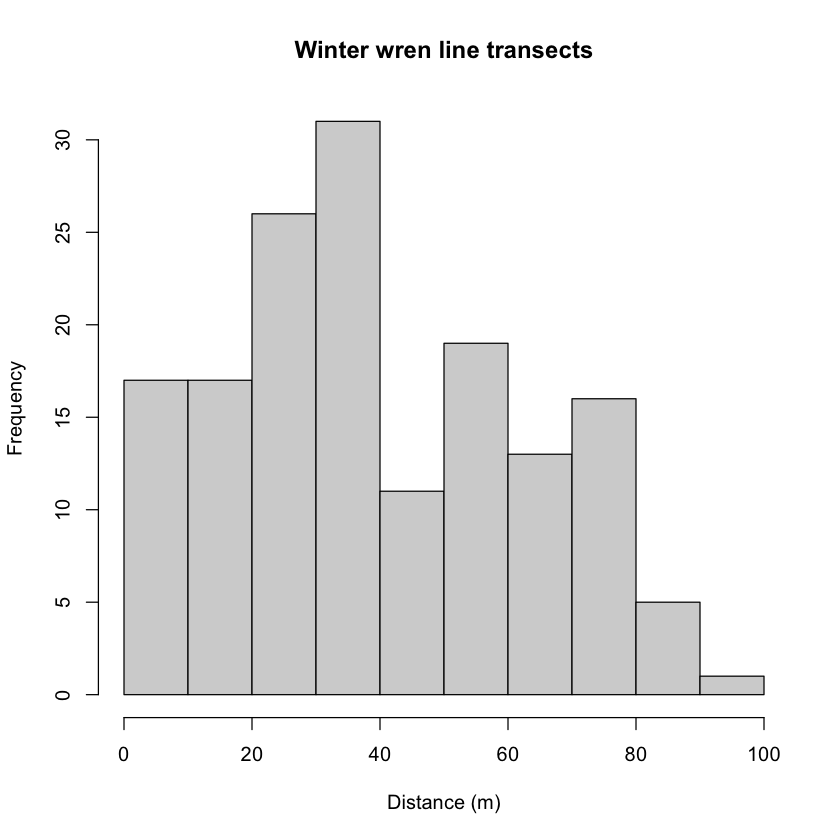

In [4]:
hist(wren_lt$distance, xlab="Distance (m)", main="Winter wren line transects")

### Specify unit conversions

> A guaranteed way to produce incorrect results from your analysis is to misspecify the units distances are measured. The ds function has an argument convert.units where the user provides a value to report density in proper units. Providing an incorrect value will result in estimates that are out by orders of magnitude.

In [5]:
conversion.factor <- convert_units("meter", "kilometer", "hectare")

### Fitting a simple detection function model with ds

In [6]:
wren.hn <- ds(data=wren_lt, key="hn", adjustment=NULL,
              convert.units=conversion.factor)

Fitting half-normal key function

Key only model: not constraining for monotonicity.

AIC= 1418.188



In [7]:
summary(wren.hn)


Summary for distance analysis 
Number of observations :  156 
Distance range         :  0  -  100 

Model : Half-normal key function 
AIC   : 1418.188 

Detection function parameters
Scale coefficient(s):  
            estimate        se
(Intercept) 4.105816 0.1327744

                      Estimate          SE         CV
Average p             0.685037  0.05678866 0.08289868
N in covered region 227.724931 21.47288594 0.09429308

Summary statistics:
    Region Area CoveredArea Effort   n  k       ER    se.ER      cv.ER
1 Montrave 33.2       193.2   9.66 156 19 16.14907 1.226096 0.07592366

Abundance:
  Label Estimate       se        cv      lcl      ucl       df
1 Total 39.13286 4.399026 0.1124126 31.30227 48.92235 74.24692

Density:
  Label Estimate        se        cv       lcl      ucl       df
1 Total   1.1787 0.1325008 0.1124126 0.9428394 1.473565 74.24692

### The summary function

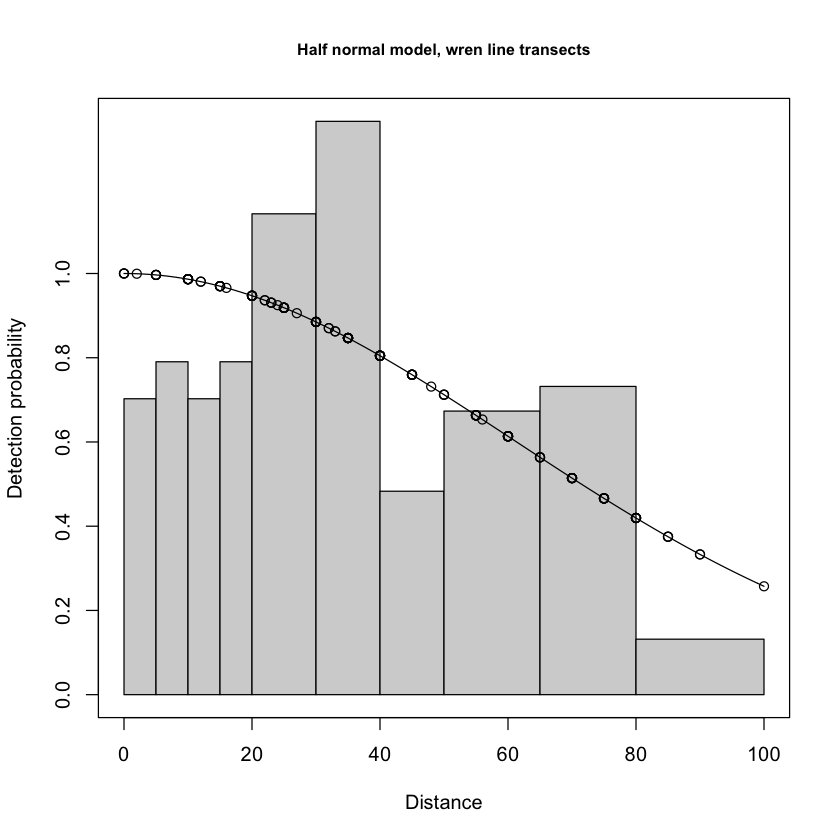

In [8]:
cutpoints <- c(0,5,10,15,20,30,40,50,65,80,100)
plot(wren.hn, breaks=cutpoints, main="Half normal model, wren line transects")